In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import pickle
import pandas as pd

In [35]:
def generate_multicol_countplot(df, cols, title, ax=None):
    sums = []
    for col in cols:
        sums.append(df[col].sum())
    # Removing the x{num}_ that comes with sklearn one hot encode
    cols = [col[3:].capitalize() for col in cols if '_' in col]

    if ax is None:
        sns.barplot(x=sums, y=list(range(len(cols))), orient='h')
        plt.yticks(list(range(len(cols))), cols)
        plt.title(title)
    else:
        sns.barplot(x=sums, y=list(range(len(cols))), orient='h', ax=ax)
        ax.set_yticklabels(cols)
        ax.set_title(title)

In [36]:
plt.figure(figsize=(10,6))
style.use('seaborn-poster')
sns.set_style('ticks')

<Figure size 720x432 with 0 Axes>

# Clustering Results
## Determining Optimal K
* Elbow method

In [37]:
with open('Data/pickles/elbow', 'rb') as file:
    clustering_scores = pickle.load(file)

(0.5, 10.0)

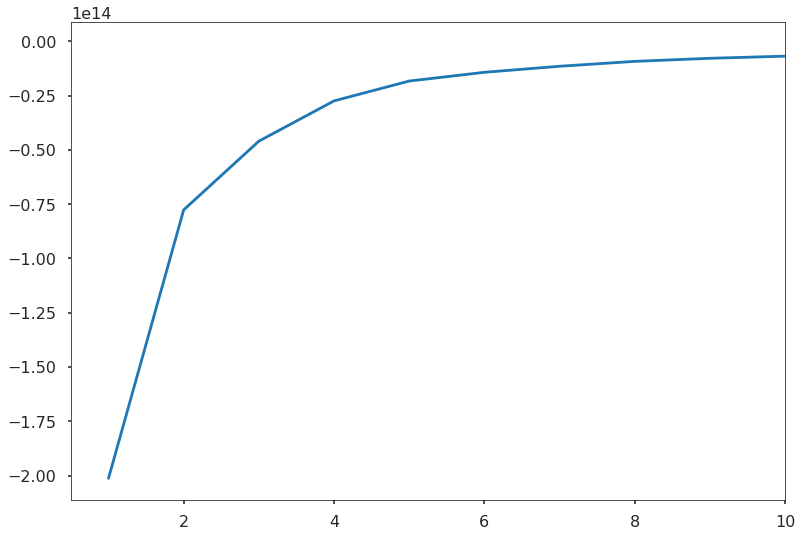

In [38]:
sns.lineplot(x=clustering_scores['clusters'], y=clustering_scores['scores'])
plt.xlim(0.5, 10)

* Seems that 3 clusters is the optimal number for clusters

In [39]:
df = pd.read_pickle('Data/pickles/clustered_df')
print(df.columns)

Index(['x0_CAN', 'x0_MEX', 'x0_PR', 'x0_US', 'x1_airline', 'x1_auto',
       'x1_cable/phone', 'x1_entertainment', 'x1_fastfood', 'x1_food',
       'x1_food_delivery', 'x1_fuel', 'x1_furniture', 'x1_gym', 'x1_health',
       'x1_hotels', 'x1_mobileapps', 'x1_online_gifts', 'x1_online_retail',
       'x1_online_subscriptions', 'x1_personal care', 'x1_rideshare',
       'x1_subscriptions', 'x2_01', 'x2_08', 'x2_99', 'x3_02', 'x3_05',
       'x3_09', 'x3_80', 'x3_90', 'x4_ADDRESS_VERIFICATION', 'x4_PURCHASE',
       'x4_REVERSAL', 'x5_CAN', 'x5_MEX', 'x5_PR', 'x5_US', 'creditLimit',
       'availableMoney', 'transactionAmount', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'matchingCVV', 'isFraud', 'cluster',
       'accountNumber'],
      dtype='object')


In [40]:
cluster0_df = df[df['cluster'] == 'cluster_0']
cluster1_df = df[df['cluster'] == 'cluster_1']
cluster2_df = df[df['cluster'] == 'cluster_2']

# Cluster Cardinality
Let's see how the data falls into the different clusters

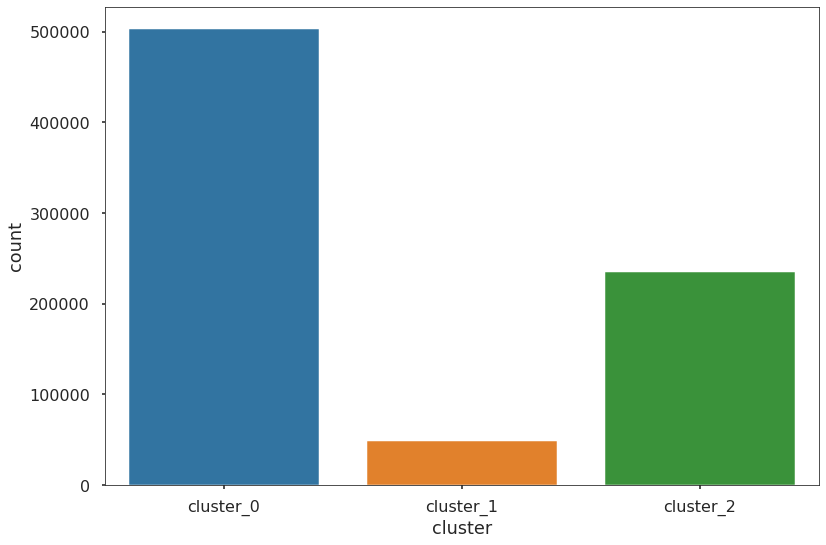

In [41]:
sns.countplot(data=df, x='cluster')

* Interesting that a large portion of the data falls into cluster 0
* I am hoping that the data in cluster_1 provides something very specific that could lead to some interesting discoveries

/home/jbofill/.local/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1080 with 0 Axes>

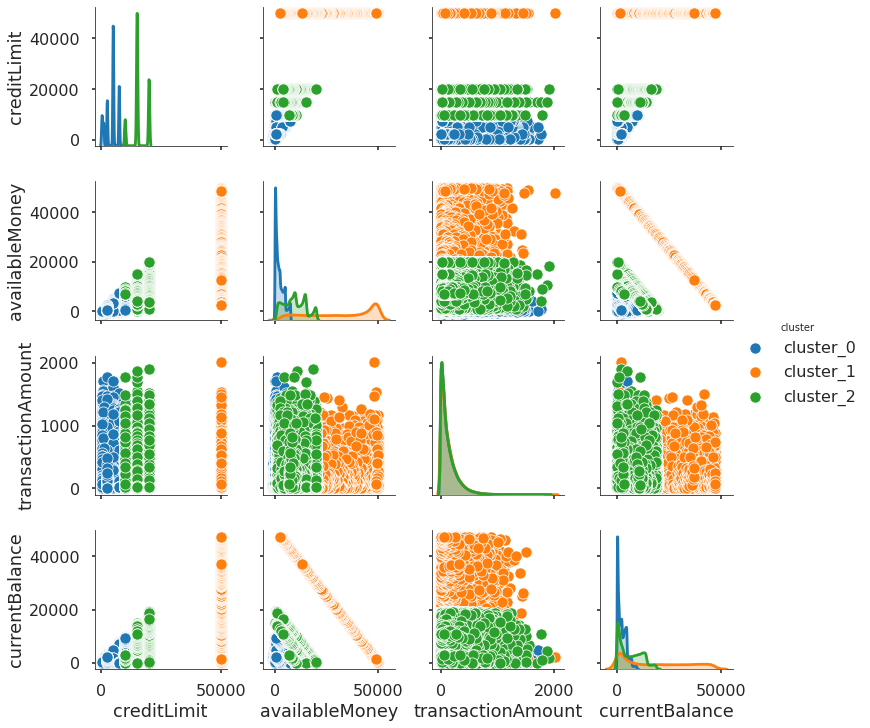

In [42]:
plt.figure(figsize=(20,15))

temp_df = df.drop(['x0_CAN', 'x0_MEX', 'x0_PR', 'x0_US', 'x1_airline', 'x1_auto',
       'x1_cable/phone', 'x1_entertainment', 'x1_fastfood', 'x1_food',
       'x1_food_delivery', 'x1_fuel', 'x1_furniture', 'x1_gym', 'x1_health',
       'x1_hotels', 'x1_mobileapps', 'x1_online_gifts', 'x1_online_retail',
       'x1_online_subscriptions', 'x1_personal care', 'x1_rideshare',
       'x1_subscriptions', 'x2_01', 'x2_08', 'x2_99', 'x3_02', 'x3_05',
       'x3_09', 'x3_80', 'x3_90', 'x4_ADDRESS_VERIFICATION', 'x4_PURCHASE',
       'x4_REVERSAL', 'x5_CAN', 'x5_MEX', 'x5_PR', 'x5_US', 'matchingCVV',
       'isFraud','expirationDateKeyInMatch', 'cardPresent', 'accountNumber'], axis=1)

sns.pairplot(data=temp_df, hue='cluster')

* Seems the cluster a transaction falls in is dependent on different banking properties/economic status that each customer has

In [43]:
plt.figure(figsize=(10,6))
style.use('seaborn-poster')
sns.set_style('ticks')

<Figure size 720x432 with 0 Axes>

# Merchant Category Popularity between Clusters

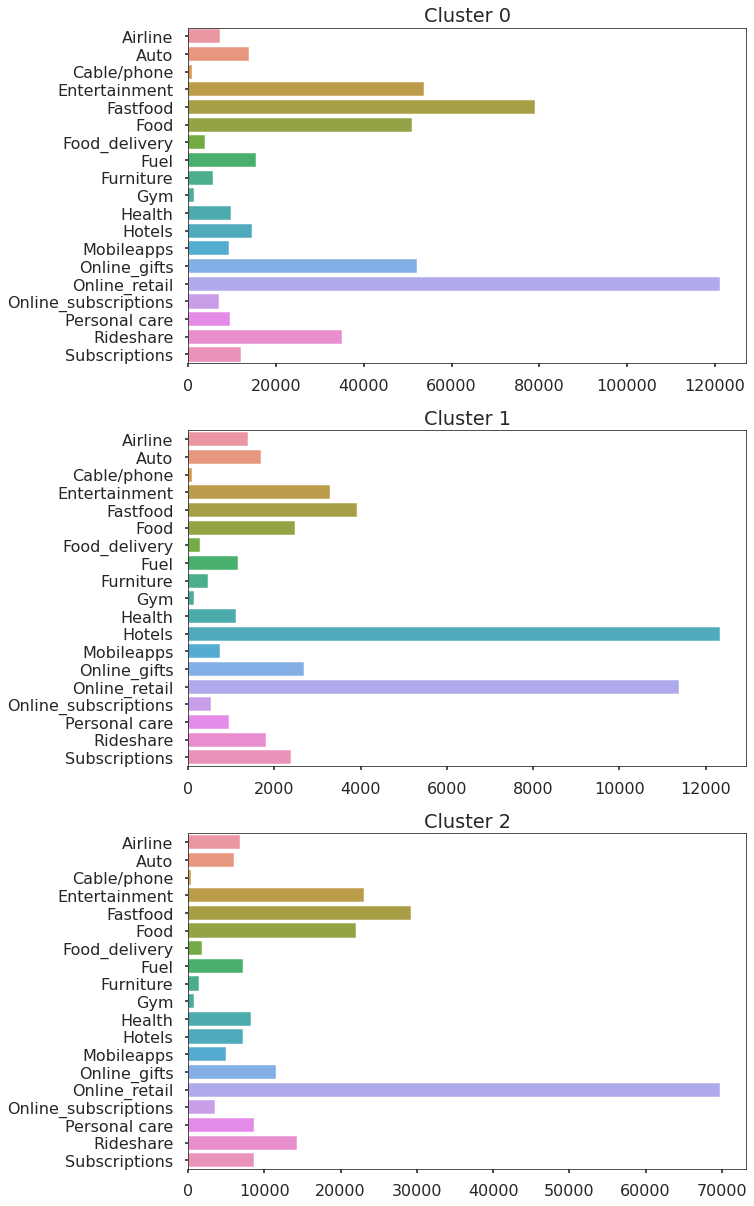

In [44]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,21))

generate_multicol_countplot(cluster0_df, ['x1_airline', 'x1_auto',
       'x1_cable/phone', 'x1_entertainment', 'x1_fastfood', 'x1_food',
       'x1_food_delivery', 'x1_fuel', 'x1_furniture', 'x1_gym', 'x1_health',
       'x1_hotels', 'x1_mobileapps', 'x1_online_gifts', 'x1_online_retail',
       'x1_online_subscriptions', 'x1_personal care', 'x1_rideshare',
       'x1_subscriptions'], 'Cluster 0', ax=ax[0])

generate_multicol_countplot(cluster1_df, ['x1_airline', 'x1_auto',
       'x1_cable/phone', 'x1_entertainment', 'x1_fastfood', 'x1_food',
       'x1_food_delivery', 'x1_fuel', 'x1_furniture', 'x1_gym', 'x1_health',
       'x1_hotels', 'x1_mobileapps', 'x1_online_gifts', 'x1_online_retail',
       'x1_online_subscriptions', 'x1_personal care', 'x1_rideshare',
       'x1_subscriptions'], 'Cluster 1', ax=ax[1])

generate_multicol_countplot(cluster2_df, ['x1_airline', 'x1_auto',
       'x1_cable/phone', 'x1_entertainment', 'x1_fastfood', 'x1_food',
       'x1_food_delivery', 'x1_fuel', 'x1_furniture', 'x1_gym', 'x1_health',
       'x1_hotels', 'x1_mobileapps', 'x1_online_gifts', 'x1_online_retail',
       'x1_online_subscriptions', 'x1_personal care', 'x1_rideshare',
       'x1_subscriptions'], 'Cluster 2', ax=ax[2])

* Cluster 0 and 2 are fairly similar -- cluster 0 just has many more elements
* Interesting that the most popular merchant category in cluster 1 is hotel related transactions despite online retail being the most popular among the entire data set
* Aside from that, the proportions of the rest of the merchant categories among all clusters seem to be about the same

## Exploring Hotel Related Transactions in Cluster 2
* I am interested in why there are so many hotel related transactions in cluster 1 in comparison to the rest
* My one initial guess is that it's possible that it might be a few people that just had a lot of hotel related transactions -- even so there are a significant amount of transactions, so I doubt it

In [49]:
cluster1_hotel = cluster1_df[cluster1_df['x1_hotels'] == 1]
len(cluster1_hotel['accountNumber'].unique())

42

* Interesting as there are only 42 unique accounts in this cluster, but over 12000 hotel related transactions

In [46]:
print(df.columns)

Index(['x0_CAN', 'x0_MEX', 'x0_PR', 'x0_US', 'x1_airline', 'x1_auto',
       'x1_cable/phone', 'x1_entertainment', 'x1_fastfood', 'x1_food',
       'x1_food_delivery', 'x1_fuel', 'x1_furniture', 'x1_gym', 'x1_health',
       'x1_hotels', 'x1_mobileapps', 'x1_online_gifts', 'x1_online_retail',
       'x1_online_subscriptions', 'x1_personal care', 'x1_rideshare',
       'x1_subscriptions', 'x2_01', 'x2_08', 'x2_99', 'x3_02', 'x3_05',
       'x3_09', 'x3_80', 'x3_90', 'x4_ADDRESS_VERIFICATION', 'x4_PURCHASE',
       'x4_REVERSAL', 'x5_CAN', 'x5_MEX', 'x5_PR', 'x5_US', 'creditLimit',
       'availableMoney', 'transactionAmount', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'matchingCVV', 'isFraud', 'cluster',
       'accountNumber'],
      dtype='object')


# Fradulent Transactions
* I am hopeful that there will be some sort of trend in fraudulent transactions found by clustering

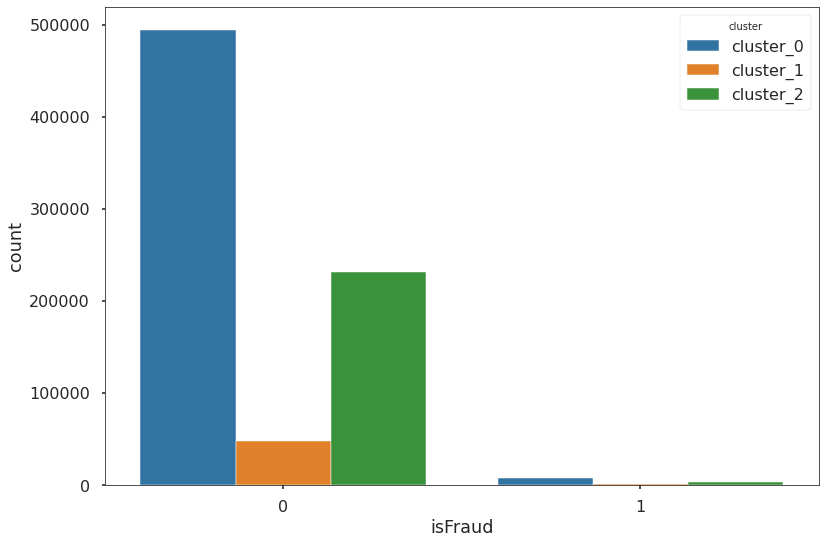

In [47]:
sns.countplot(data=df, x='isFraud', hue='cluster')

* Does not seem to be the case unfortunately